[requests ]https://requests.readthedocs.io/en/master/user/advanced

In [1]:
import requests

In [4]:
r = requests.get('https://api.github.com/events')
r.status_code

200

In [7]:
r = requests.post('https://httpbin.org/post', data={'key': 'value'})  # put, delete, head, options
r

<Response [200]>

## Passing Parameters In URLs

In [12]:
payload = {'key1': 'value1', 'key2': 'value2', 'key3': None}
r = requests.get('https://httpbin.org/get', params=payload)
r.url

'https://httpbin.org/get?key1=value1&key2=value2'

Note that any dictionary key whose value is None will not be added to the URL’s query string, like 'key3' above

In [13]:
payload = {'key1': 'value1', 'key2': ['value2', 'value3']}
r = requests.get('https://httpbin.org/get', params=payload)
r.url

'https://httpbin.org/get?key1=value1&key2=value2&key2=value3'

## Response Content

In [ ]:
r = requests.get('https://api.github.com/events')
r.text

In [16]:
r.encoding

'utf-8'

In [ ]:
r.content

## Binary Response Content

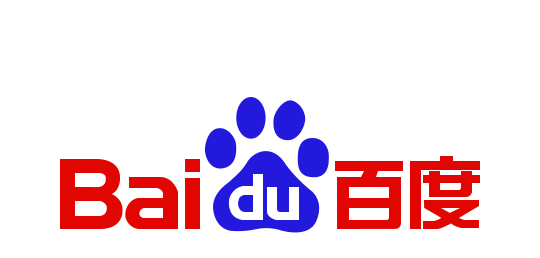

In [22]:
from PIL import Image
from io import BytesIO
r = requests.get('https://www.baidu.com/img/bd_logo1.png?where=super')
i = Image.open(BytesIO(r.content))
i

## JSON Response Content

In [ ]:
r = requests.get('https://api.github.com/events')
r.json()

In [26]:
r.raise_for_status(), r.status_code

(None, 200)

## Raw Response Content

In [27]:
r = requests.get('https://api.github.com/events', stream=True)
r.raw.read(10)

b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x03'

In [ ]:
with open(filename, 'wb') as fd:
    for chunk in r.iter_content(chunk_size=128):
        fd.wirte(chunk)

## Custom Headers

In [29]:
url = 'https://api.github.com/some/endpoint'
headers = {'user-agent': 'my-app/0.0.1'}
r = requests.get(url, headers=headers)

In [33]:
r.status_code

404

## More complicated POST requests

In [34]:
playload = {'key1': 'value1', 'key2': 'value2'}
r = requests.post("https://httpbin.org/post", data=payload)
r.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "key1": "value1", \n    "key2": [\n      "value2", \n      "value3"\n    ]\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "35", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.22.0", \n    "X-Amzn-Trace-Id": "Root=1-5e302f4c-7f3937d6bc79935cb900de47"\n  }, \n  "json": null, \n  "origin": "149.28.149.79", \n  "url": "https://httpbin.org/post"\n}\n'

In [40]:
payload_tuples = [('key1', 'value1'), ('key1', 'value2')]
r1 = requests.post('https://httpbin.org/post', data=payload_tuples)
payload_dict = {'key1': ['value1', 'value2']}
r2 = requests.post('https://httpbin.org/post', data=payload_dict)
r1.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "key1": [\n      "value1", \n      "value2"\n    ]\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "23", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.22.0", \n    "X-Amzn-Trace-Id": "Root=1-5e303234-8693d814580fcaf8c1a25864"\n  }, \n  "json": null, \n  "origin": "149.28.149.79", \n  "url": "https://httpbin.org/post"\n}\n'

In [42]:
r2.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "key1": [\n      "value1", \n      "value2"\n    ]\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "23", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.22.0", \n    "X-Amzn-Trace-Id": "Root=1-5e303238-76643f9a7c8c78d8f20e789c"\n  }, \n  "json": null, \n  "origin": "149.28.149.79", \n  "url": "https://httpbin.org/post"\n}\n'

In [43]:
r1.text == r2.text

False

In [48]:
import json
url = 'https://api.github.com/some/endpoint'
payload = {'some': 'data'}
r1 = requests.post(url, data=json.dumps(payload))
r2 = requests.post(url, json=payload)
r1

<Response [404]>

In [49]:
r1.text

'{"message":"Not Found","documentation_url":"https://developer.github.com/v3"}'

In [47]:
r2.text

'{"message":"Not Found","documentation_url":"https://developer.github.com/v3"}'

## POST a Multipart-Encoded File

In [ ]:
url = 'https://httpbin.org/post'
files = {'file': open('report.xls', 'rb')}
r = requests.post(url, files=files)
r.text

## Response Status Codes

In [52]:
r = requests.get('https://httpbin.org/get')
r.status_code

200

In [53]:
r.status_code == requests.codes.ok

True

In [57]:
bad_r = requests.get('https://httpbin.org/status/404')
bad_r.status_code

404

In [58]:
bad_r.raise_for_status()

HTTPError: 404 Client Error: NOT FOUND for url: https://httpbin.org/status/404

## Response Headers

In [59]:
r.headers

{'Date': 'Tue, 28 Jan 2020 13:19:56 GMT', 'Content-Type': 'application/json', 'Content-Length': '307', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

HTTP Header names are case-insensitive.

In [62]:
r.headers['Content-Length'], r.headers['date'], r.headers.get('Server')

('307', 'Tue, 28 Jan 2020 13:19:56 GMT', 'gunicorn/19.9.0')

## Cookies

In [63]:
url = 'https://sun2y.me'
r = requests.get(url)

In [71]:
r.cookies

<RequestsCookieJar[]>

In [70]:
r.cookies.__doc__

"Compatibility class; is a cookielib.CookieJar, but exposes a dict\n    interface.\n\n    This is the CookieJar we create by default for requests and sessions that\n    don't specify one, since some clients may expect response.cookies and\n    session.cookies to support dict operations.\n\n    Requests does not use the dict interface internally; it's just for\n    compatibility with external client code. All requests code should work\n    out of the box with externally provided instances of ``CookieJar``, e.g.\n    ``LWPCookieJar`` and ``FileCookieJar``.\n\n    Unlike a regular CookieJar, this class is pickleable.\n\n    .. warning:: dictionary operations that are normally O(1) may be O(n).\n    "

In [72]:
url = 'https://httpbin.org/cookies'
cookies = dict(cookies_are='working')
r = requests.get(url, cookies=cookies)

In [73]:
r.text

'{\n  "cookies": {\n    "cookies_are": "working"\n  }\n}\n'

In [77]:
jar = requests.cookies.RequestsCookieJar()

In [78]:
jar

<RequestsCookieJar[]>

In [79]:
jar.set('tasty_cookie', 'yum', domain='httpbin.org', path='/cookies')
jar.set('gross_cookie', 'blech', domain='httpbin.org', path='/elsewhere')
url = 'https://httpbin.org/cookies'

In [80]:
r = requests.get(url, cookies=jar)
r.text

'{\n  "cookies": {\n    "tasty_cookie": "yum"\n  }\n}\n'

## Redirection and History

In [81]:
r = requests.get('http://github.com')
r.url

'https://github.com/'

In [83]:
r.history, r.status_code

([<Response [301]>], 200)

In [84]:
r = requests.get('http://github.com', allow_redirects=False)
r.status_code, r.history

(301, [])

## Timeouts

In [ ]:
requests.get('https://github.com/', timeout=0.001)

## Session Objects

In [86]:
s = requests.Session()
s

In [87]:
s.get('https://httpbin.org/cookies/set/sessioncookie/123456789')

<Response [200]>

In [88]:
r = s.get('https://httpbin.org/cookies')
r.text

'{\n  "cookies": {\n    "sessioncookie": "123456789"\n  }\n}\n'

In [90]:
s.auth, s.headers

(None,
 {'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'})

In [91]:
s.headers.update({'x-text': 'true'})
s.headers

{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'x-text': 'true'}

In [93]:
r = s.get('https://httpbin.org/headers', headers={'x-test2': 'true'})

In [94]:
r.text

'{\n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Cookie": "sessioncookie=123456789", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.22.0", \n    "X-Amzn-Trace-Id": "Root=1-5e304124-0019e49067d1e6da6fb8ef6d", \n    "X-Test2": "true", \n    "X-Text": "true"\n  }\n}\n'

In [95]:
r = s.get('https://httpbin.org/cookies', cookies={'from-my': 'browser'})

In [96]:
r.text

'{\n  "cookies": {\n    "from-my": "browser", \n    "sessioncookie": "123456789"\n  }\n}\n'

In [97]:
r = s.get('https://httpbin.org/cookies')
r.text

'{\n  "cookies": {\n    "sessioncookie": "123456789"\n  }\n}\n'

In [98]:
with requests.Session() as s:
    s.get('https://httpbin.org/cookies/set/sessioncookie/123456789')

In [99]:
dir(s)

['__attrs__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'adapters',
 'auth',
 'cert',
 'close',
 'cookies',
 'delete',
 'get',
 'get_adapter',
 'get_redirect_target',
 'head',
 'headers',
 'hooks',
 'max_redirects',
 'merge_environment_settings',
 'mount',
 'options',
 'params',
 'patch',
 'post',
 'prepare_request',
 'proxies',
 'put',
 'rebuild_auth',
 'rebuild_method',
 'rebuild_proxies',
 'request',
 'resolve_redirects',
 'send',
 'should_strip_auth',
 'stream',
 'trust_env',
 'verify']

## Request and Response Objects

In [100]:
r = requests.get('https://en.wikipedia.org/wiki/Monty_Python')
r.headers

{'Date': 'Tue, 28 Jan 2020 05:17:56 GMT', 'Vary': 'Accept-Encoding,Cookie,Authorization', 'Server': 'ATS/8.0.5', 'X-ATS-Timestamp': '1580188676', 'Content-Type': 'text/html; charset=UTF-8', 'X-Powered-By': 'PHP/7.2.26-1+0~20191218.33+debian9~1.gbpb5a340+wmf1', 'X-Content-Type-Options': 'nosniff', 'P3P': 'CP="See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."', 'Content-language': 'en', 'Content-Encoding': 'gzip', 'Last-Modified': 'Sat, 25 Jan 2020 06:00:42 GMT', 'Backend-Timing': 'D=194516 t=1579932187783733', 'X-Varnish': '225031612 790436076', 'Age': '32527', 'X-Cache': 'cp5012 miss, cp5008 hit/32', 'X-Cache-Status': 'hit-front', 'Server-Timing': 'cache;desc="hit-front"', 'Strict-Transport-Security': 'max-age=106384710; includeSubDomains; preload', 'Set-Cookie': 'WMF-Last-Access=28-Jan-2020;Path=/;HttpOnly;secure;Expires=Sat, 29 Feb 2020 12:00:00 GMT, WMF-Last-Access-Global=28-Jan-2020;Path=/;Domain=.wikipedia.org;HttpOnly;secure;Expires=Sat, 29 Feb 2020 1

In [101]:
r.request.headers

{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

## SSL Cert Verification

In [ ]:
requests.get('https://requestb.in')
# SSLError: HTTPSConnectionPool(host='requestb.in', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:777)'),))

In [ ]:
requests.get('https://github.com', verify='/path/to/certfile')

In [105]:
s = requests.Session()
s.verfify = '/path/to/certfile'

In [107]:
requests.get('https://kennethreitz.org', verify=False)

c:\users\kid\envs\python3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
c:\users\kid\envs\python3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Response [200]>

## Client Side Certificates

In [ ]:
requests.get('https://kennethreitz.org', cert=('/path/client.cert', '/path/client.key'))

In [ ]:
s = requests.Session()
s.cert = '/path/client.cert'